In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ebrahimrabea","key":"73017daedf81670e5665686932ddb482"}'}

In [5]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 736M/745M [00:05<00:00, 151MB/s]
100% 745M/745M [00:05<00:00, 144MB/s]


In [6]:
from zipfile import ZipFile
file_name = "covid19-radiography-database.zip"
with ZipFile(file_name , 'r')as zip:
  zip.extractall()
  print('done')

done


In [7]:
 input_folder = "/content/Dataset"
output = "/content"

In [8]:
!pip install split-folders
import splitfolders as sf
input_folder = "/content/Dataset"
output = "/content"
#where you want the split datasets saved. one will be created if none is set

sf.ratio(input_folder, output="output", seed=42, ratio=(.8, .0,.2))
#train ,val,test

Copying files: 13808 files [00:03, 3565.44 files/s]


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import keras,os
from keras.models import*
from keras.layers import*
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import PIL

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_d = ImageDataGenerator()
traindata = train_d.flow_from_directory(directory ="/content/output/train",target_size=(224,224))

test_d = ImageDataGenerator()
testdata = test_d.flow_from_directory(directory="/content/output/test",target_size=(224,224))

Found 11045 images belonging to 2 classes.
Found 2763 images belonging to 2 classes.


In [18]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (256, 256, 3),
                 kernel_size = (11, 11), strides = (4, 4),
                 padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling 
model.add(MaxPooling2D(pool_size = (2, 2),
            strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), 
            padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), 
            padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# Flattening
model.add(Flatten())
  
# 1st Dense Layer
model.add(Dense(4096, input_shape = (256*256*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
  
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
  
# Output Softmax Layer
model.add(Dense(2))
model.add(Activation('softmax'))

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 96)        34944     
_________________________________________________________________
activation_8 (Activation)    (None, 62, 62, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 96)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 31, 31, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 256)       2973952   
_________________________________________________________________
activation_9 (Activation)    (None, 21, 21, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 256)      

In [21]:
model.fit_generator(traindata,
                    steps_per_epoch = 3,
                    epochs = 15,
                    validation_data = testdata)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15


InvalidArgumentError: ignored

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5",
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode="auto",period=1)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode="auto")

hist=model.fit_generator(steps_per_epoch=5,
                         generator=traindata,
                         validation_data=testdata,
                         validation_steps=1,
                         epochs=50,
                         callbacks=[checkpoint,early])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


5/5 [==============================] - 1s 199ms/step - loss: 0.6086 - accuracy: 0.7250 - val_loss: 127.3785 - val_accuracy: 0.2500

Epoch 00001: val_accuracy improved from -inf to 0.25000, saving model to vgg16_1.h5
Epoch 2/50
5/5 [==============================] - 1s 182ms/step - loss: 0.4420 - accuracy: 0.8000 - val_loss: 128.6733 - val_accuracy: 0.1875

Epoch 00002: val_accuracy did not improve from 0.25000
Epoch 3/50
5/5 [==============================] - 1s 170ms/step - loss: 0.5704 - accuracy: 0.7312 - val_loss: 112.9678 - val_accuracy: 0.2500

Epoch 00003: val_accuracy did not improve from 0.25000
Epoch 4/50
5/5 [==============================] - 1s 171ms/step - loss: 0.5081 - accuracy: 0.7750 - val_loss: 71.4585 - val_accuracy: 0.2812

Epoch 00004: val_accuracy improved from 0.25000 to 0.28125, saving model to vgg16_1.h5
Epoch 5/50
5/5 [==============================] - 1s 177ms/step - loss: 0.4808 - accuracy: 0.7750 - val_loss: 39.8523 - val_accuracy: 0.2188

Epoch 00005: val_

In [16]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

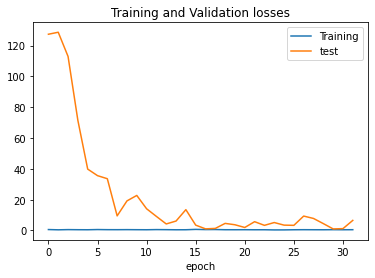

In [17]:
hist.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training','test'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')